In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [3]:
#Récupération de notre jeu de donnée propre

df=pd.read_csv("openmedic_1211.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789922 entries, 0 to 789921
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Sous-groupe_pharmacologique             789922 non-null  object 
 1   Libelle_sous-groupe_pharmacologique     789922 non-null  object 
 2   Code_identification_pharmaceutique      789922 non-null  int64  
 3   Libelle_code_Specialite_pharmaceutique  789922 non-null  object 
 4   Top_Generique                           789922 non-null  object 
 5   Tranche_age_soins                       789922 non-null  object 
 6   Code_region_residence                   789922 non-null  int64  
 7   Code_prescripteur                       789922 non-null  int64  
 8   Nb_boites_delivrees                     789922 non-null  int64  
 9   Montant_rembourse                       789922 non-null  float64
 10  Base_remboursement                      7899

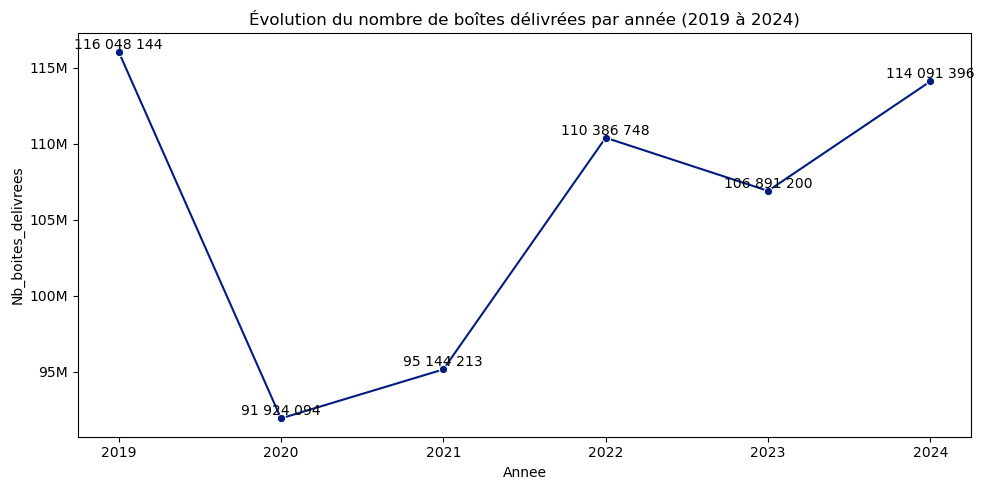

Constat:

Nous observons une chute du nombre de boite délivrées de 2019 à 2020, cette 
 période correspond à la période du Covid en France.


In [5]:
# Évolution du nombre de boîtes délivrées par année

sns.set_palette("dark")
df_boite= df.groupby("Annee")["Nb_boites_delivrees"].sum().reset_index()

plt.figure(figsize=(10,5))

ax = sns.lineplot(data=df_boite, x="Annee", y="Nb_boites_delivrees", marker="o")

plt.title("Évolution du nombre de boîtes délivrées par année (2019 à 2024)")
plt.xticks(rotation=0)

# Ajout des étiquettes de donnée
for x, y in zip(df_boite["Annee"],df_boite["Nb_boites_delivrees"]):
    plt.text(x, y, f"{y:,.0f}".replace(",", " "), ha="center", va="bottom")

# Formatage axe vertical : afficher en millions
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons une chute du nombre de boite délivrées de 2019 à 2020, cette \n période correspond à la période du Covid en France.")

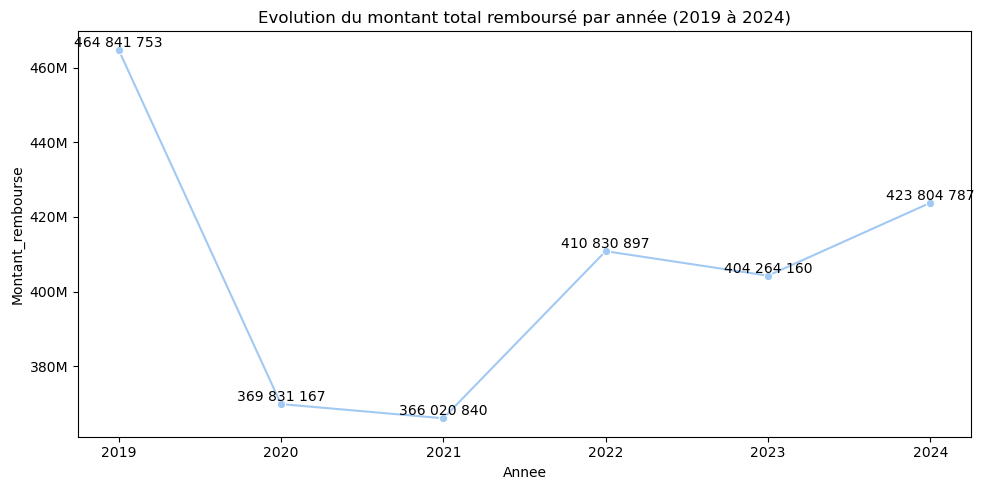

Constat:

Nous observons une chute du montant de remboursement de 2019 à 2020,cette 
 donnée est similaire à la tendance retrouvé dans le graphique précédent.


In [6]:
#Evolution du montant total remboursé par année

sns.set_palette("pastel")
df_montant = df.groupby("Annee")["Montant_rembourse"].sum().reset_index()

plt.figure(figsize=(10,5))

ax = sns.lineplot(data=df_montant, x="Annee", y="Montant_rembourse", marker="o")

plt.title("Evolution du montant total remboursé par année (2019 à 2024)")
plt.xticks(rotation=0)

# Ajout des étiquettes de donnée
for x, y in zip(df_montant["Annee"], df_montant["Montant_rembourse"]):
    plt.text(x, y, f"{y:,.0f}".replace(",", " "), ha="center", va="bottom")

# Formatage axe vertical : afficher en millions
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons une chute du montant de remboursement de 2019 à 2020,cette \n donnée est similaire à la tendance retrouvé dans le graphique précédent.")

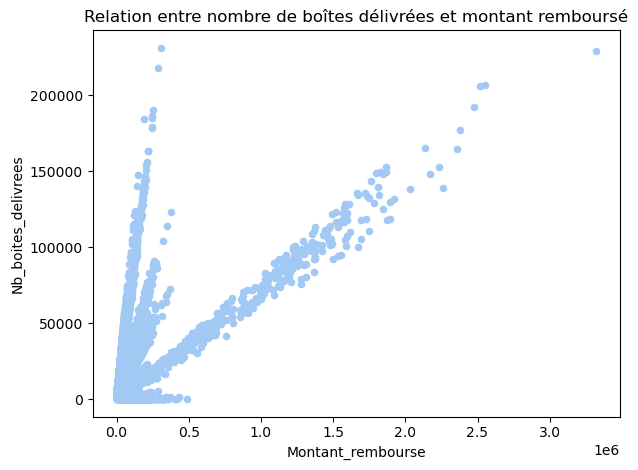

Constat:

Nous observons une corrélation positive entre le nombre de boite délivrées et le 
 montant remboursé. En effet nous avons un nuage de point concentré allant vers une 
 diagonale haute, de fait la tendance du nombre de boite suit celle du montant du 
 remboursement.


In [21]:
df.plot.scatter(x="Montant_rembourse", y="Nb_boites_delivrees", title="Relation entre nombre de boîtes délivrées et montant remboursé")

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons une corrélation positive entre le nombre de boite délivrées et le \n montant remboursé. En effet nous avons un nuage de point concentré allant vers une \n diagonale haute, de fait la tendance du nombre de boite suit celle du montant du \n remboursement.")


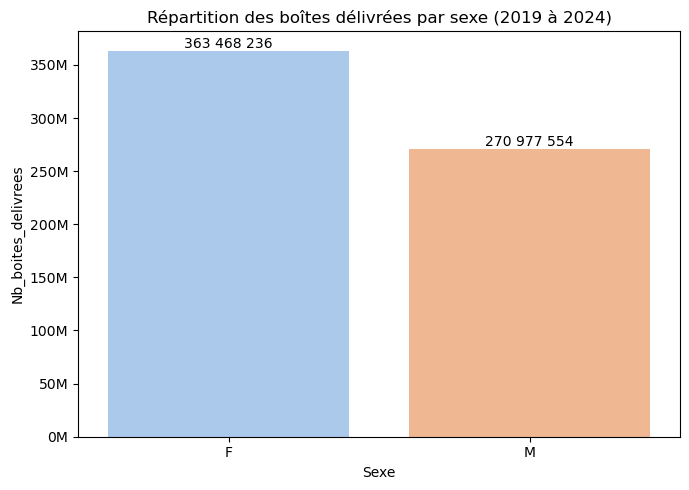

Constat:

Nous observons une part de femme supérieure aux hommes ayant commandé des boites de 
 médicament.


In [24]:
# Répartition par Sexe du nombre de boite délivrés

sns.set_palette("pastel")
df_sexe = df.groupby("Sexe")["Nb_boites_delivrees"].sum().reset_index()

plt.figure(figsize=(7,5))
ax = sns.barplot(data=df_sexe[df_sexe["Sexe"]!="Inconnu"], x="Sexe", y="Nb_boites_delivrees")

plt.title("Répartition des boîtes délivrées par sexe (2019 à 2024)")

# Ajout des étiquettes de donnée
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        f"{height:,.0f}".replace(",", " "),
        ha="center",
        va="bottom"
    )
    
# Formatage axe vertical : afficher en millions
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons une part de femme supérieure aux hommes ayant commandé des boites de \n médicament.")


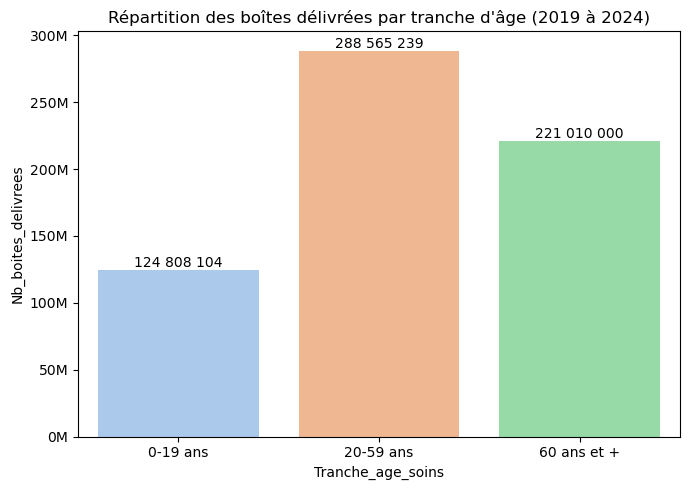

Constat:

Nous observons que ceux ayant commandé le plus de boites de médicament ont entre 20 et 59 ans.


In [26]:
# Répartition par tranche d'âge du nombre de boite délivrés

sns.color_palette("pastel")

df_age= df.groupby("Tranche_age_soins")["Nb_boites_delivrees"].sum().reset_index()

plt.figure(figsize=(7,5))
ax = sns.barplot(data=df_age[df_age["Tranche_age_soins"]!="Inconnu"], x="Tranche_age_soins", y="Nb_boites_delivrees")

plt.title("Répartition des boîtes délivrées par tranche d'âge (2019 à 2024)")

# Ajout des étiquettes de donnée
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        f"{height:,.0f}".replace(",", " "),
        ha="center",
        va="bottom"
    )
    
# Formatage axe vertical : afficher en millions
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons que ceux ayant commandé le plus de boites de médicament ont entre 20 et 59 ans.")


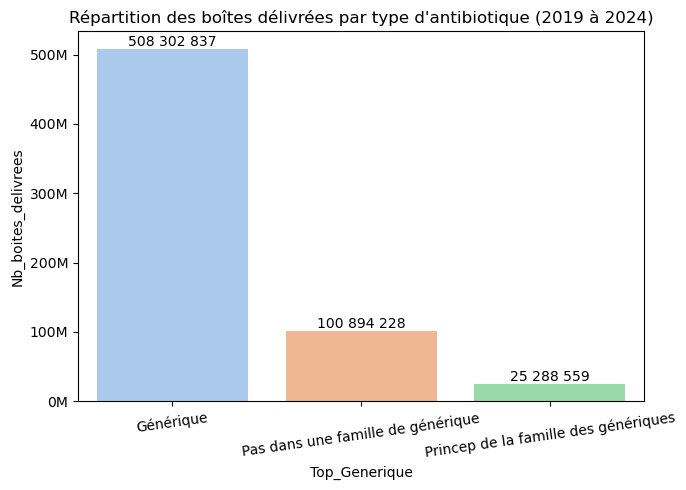

Constat:

Nous observons une majorité de médicatiment 'Générique' délivrée.


In [28]:
# Répartition du nombre de boite délivrés par type d'antibiotique

sns.color_palette("pastel")

df_type= df.groupby("Top_Generique")["Nb_boites_delivrees"].sum().reset_index()

plt.figure(figsize=(7,5))
ax = sns.barplot(data=df_type[df_type["Top_Generique"]!="Inconnu"], x="Top_Generique", y="Nb_boites_delivrees")

plt.title("Répartition des boîtes délivrées par type d'antibiotique (2019 à 2024)")
plt.xticks(rotation=8)

# Ajout des étiquettes de donnée
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        f"{height:,.0f}".replace(",", " "),
        ha="center",
        va="bottom"
    )
    
# Formatage axe vertical : afficher en millions
ax.get_yaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons une majorité de médicatiment 'Générique' délivrée.") 

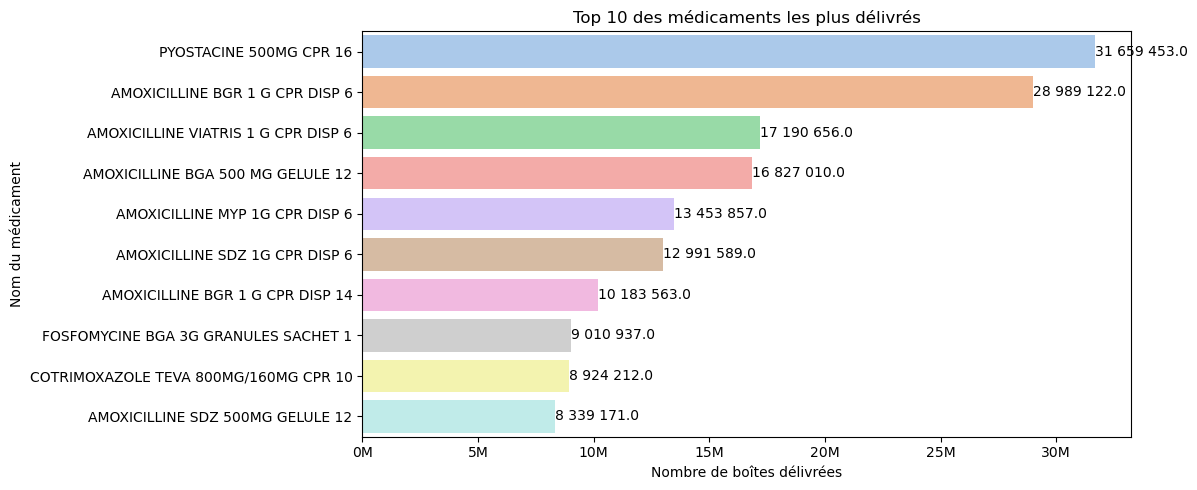

Constat:

Nous observons que la boite de PYOSTACINE 500MG CPR 16 arrive en tête du Top 10 des 
 médicaments les plus délivrés.


In [43]:
#Top 10 des médicaments les plus délivrés

df_top10 = (
    df.groupby("Libelle_code_Specialite_pharmaceutique")["Nb_boites_delivrees"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_top10, 
    y="Libelle_code_Specialite_pharmaceutique",
    x="Nb_boites_delivrees" 
)

plt.title("Top 10 des médicaments les plus délivrés")
plt.xlabel("Nombre de boîtes délivrées")
plt.ylabel("Nom du médicament")

# Affichage des valeurs au bout des barres
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height()/2,
        f"{width:,.1f}".replace(",", " "),
        ha="left",
        va="center"
    )

# Formatage axe horizontal : afficher en millions
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons que la boite de PYOSTACINE 500MG CPR 16 arrive en tête du Top 10 des \n médicaments les plus délivrés.")


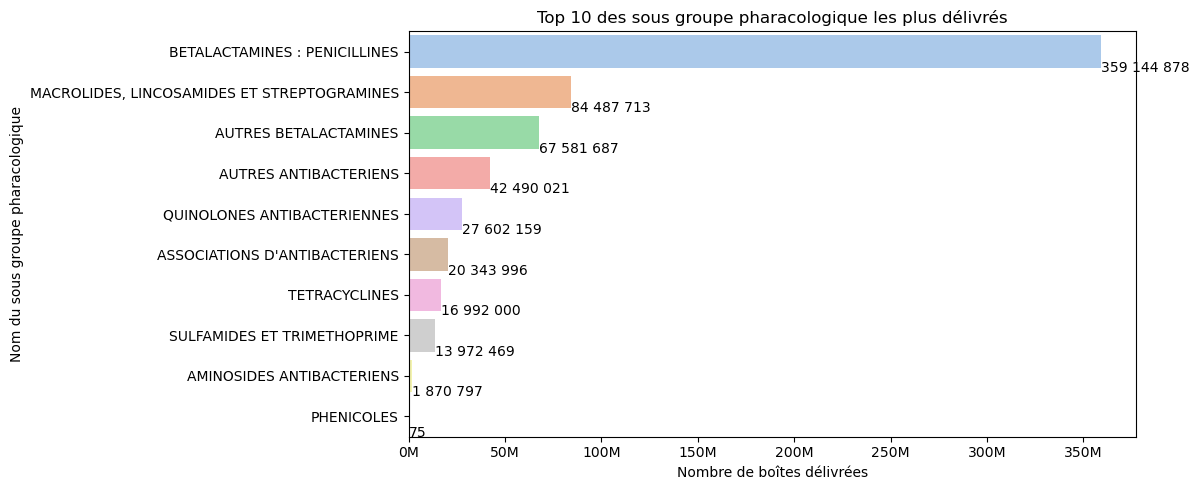

Constat:

Nous observons que la BETALACTAMINES : PENICILLINES arrive en tête du Top 10 des 
 des sous groupe pharacologique les plus délivrés.


In [44]:
# Top des sous groupe pharacologique les plus délivrées 

df_top10_groupe = (
    df.groupby("Libelle_sous-groupe_pharmacologique")["Nb_boites_delivrees"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_top10_groupe, 
    y="Libelle_sous-groupe_pharmacologique",
    x="Nb_boites_delivrees" 
)

plt.title("Top 10 des sous groupe pharacologique les plus délivrés")
plt.xlabel("Nombre de boîtes délivrées")
plt.ylabel("Nom du sous groupe pharacologique")

# Affichage des valeurs au bout des barres
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height(),
        f"{width:,.0f}".replace(",", " "),
        ha="left",
        va="center"
    )

# Formatage axe horizontal : afficher en millions
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons que la BETALACTAMINES : PENICILLINES arrive en tête du Top 10 des \n des sous groupe pharacologique les plus délivrés.")

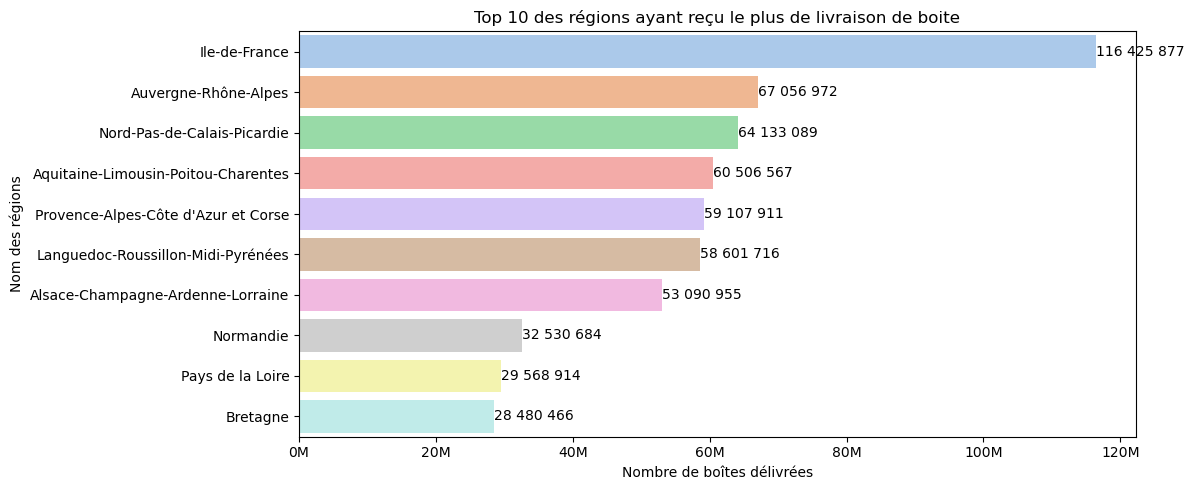

Constat:

Nous observons que l'Ile de France arrive en tête du Top 10 des 
 des régions ayant reçu le plus de livraison de boite.


In [45]:
#Top 10 des régions ayant reçu le plus de livraison de boite

df_top10_region = (
    df.groupby("Region_residence")["Nb_boites_delivrees"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_top10_region, 
    y="Region_residence",
    x="Nb_boites_delivrees" 
)

plt.title("Top 10 des régions ayant reçu le plus de livraison de boite")
plt.xlabel("Nombre de boîtes délivrées")
plt.ylabel("Nom des régions")

# Ajout des étiquettes de donnée
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height()/2,
        f"{width:,.0f}".replace(",", " "),
        ha="left",
        va="center"
    )

# Formatage axe horizontal : afficher en millions
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons que l'Ile de France arrive en tête du Top 10 des \n des régions ayant reçu le plus de livraison de boite.")


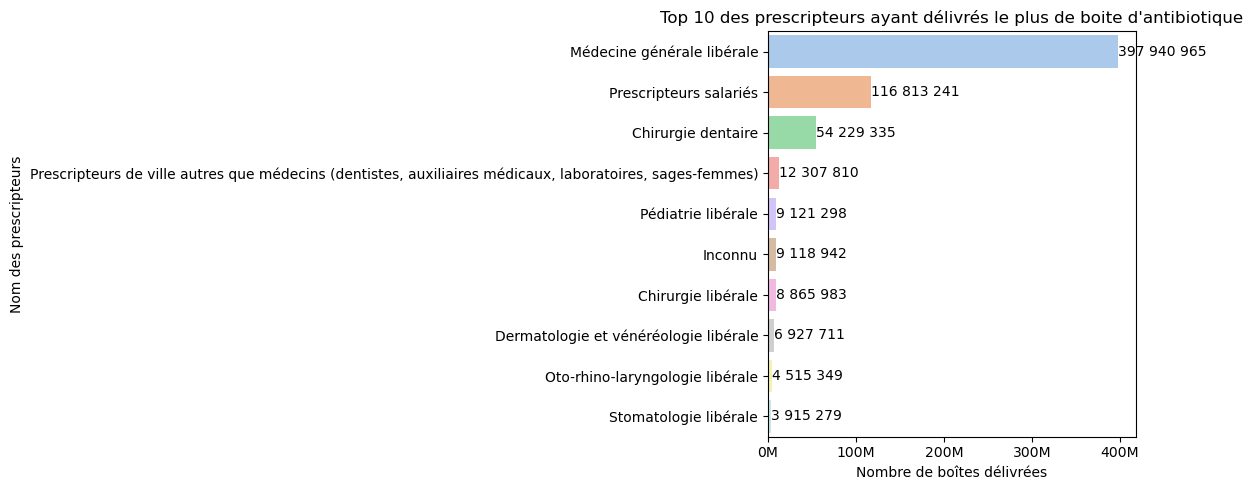

Constat:

Nous observons que la Médecine générale libérale arrive en tête du Top 10 des 
 prescripteurs ayant délivrés le plus de boite d'antibiotique.


In [47]:
#Top 10 des prescripteurs ayant délivrés le plus de boite d'antibiotique

df_top10_prescripteur = (
    df.groupby("Prescripteur")["Nb_boites_delivrees"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_top10_prescripteur , 
    y="Prescripteur",
    x="Nb_boites_delivrees" 
)

plt.title("Top 10 des prescripteurs ayant délivrés le plus de boite d'antibiotique")
plt.xlabel("Nombre de boîtes délivrées")
plt.ylabel("Nom des prescripteurs")

# Ajout des étiquettes de donnée
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height()/2,
        f"{width:,.0f}".replace(",", " "),
        ha="left",
        va="center"
    )

# Formatage axe horizontal : afficher en millions
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.0f}M")
)

plt.tight_layout()
plt.show()

print("Constat:")
print()
print("Nous observons que la Médecine générale libérale arrive en tête du Top 10 des \n prescripteurs ayant délivrés le plus de boite d'antibiotique.")

In [48]:
# Enregistrement version csv
df.to_csv("openmedic_visualisation_1711.csv", index=False)